In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive'

Mounted at /content/drive
/content/drive/MyDrive


# Scenerio 1 test

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load grayscale image
img = cv2.imread('street_view_10_grey.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the intensity histogram
hist = cv2.calcHist([img],[0],None,[256],[0,256])

# Choose the number of clusters
K = 5

# Initialize cluster centroids
centroids = np.random.randint(0, 256, size=K)

# Assign pixels to clusters
labels = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        pixel_intensity = img[i,j]
        distances = np.abs(pixel_intensity - centroids)
        cluster_index = np.argmin(distances)
        labels[i,j] = cluster_index

# Update centroids
for k in range(K):
    cluster_pixels = img[labels == k]
    if len(cluster_pixels) > 0:
        centroids[k] = np.mean(cluster_pixels)

# Repeat steps 5-6 until convergence
max_iterations = 100
for iteration in range(max_iterations):
    old_centroids = centroids.copy()

    # Assign pixels to clusters
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_intensity = img[i,j]
            distances = np.abs(pixel_intensity - centroids)
            cluster_index = np.argmin(distances)
            labels[i,j] = cluster_index

    # Update centroids
    for k in range(K):
        cluster_pixels = img[labels == k]
        if len(cluster_pixels) > 0:
            centroids[k] = np.mean(cluster_pixels)

    # Check for convergence
    if np.all(old_centroids == centroids):
        break

# Segment the image
segmented_img = np.zeros_like(img)
for k in range(K):
    segmented_img[labels == k] = centroids[k]

# Visualize the original and segmented images
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(segmented_img, cmap='gray')
axs[1].set_title('Segmented Image')
plt.show()


KeyboardInterrupt: ignored

# Scenerio 1 test2

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load grayscale image
img = cv2.imread('street_view_10_grey.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate intensity histogram
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

# Reshape image into a 2D array of pixels
pixel_values = img.reshape(-1, 1)

# Choose the number of clusters
K = 2

# Initialize cluster centroids using k-means++
centroids = np.zeros((K, 1))
centroids[0] = bins[np.argmax(hist)]
for k in range(1, K):
    distances = np.sum((pixel_values - centroids[:k])**2, axis=1)
    probabilities = distances / np.sum(distances)
    cumulative_probabilities = np.cumsum(probabilities)
    index = np.argmax(cumulative_probabilities > np.random.rand())
    centroids[k] = pixel_values[index]

# Assign pixels to clusters
labels = np.zeros((pixel_values.shape[0],))
for i in range(pixel_values.shape[0]):
    pixel_intensity = pixel_values[i, :]
    distances = np.sum((pixel_intensity - centroids)**2, axis=1)
    cluster_index = np.argmin(distances)
    labels[i] = cluster_index

# Update centroids
for k in range(K):
    cluster_pixels = pixel_values[labels == k]
    if len(cluster_pixels) > 0:
        centroids[k] = np.mean(cluster_pixels)

# Repeat steps 5-6 until convergence
max_iterations = 100
for iteration in range(max_iterations):
    old_centroids = centroids.copy()

    # Assign pixels to clusters
    for i in range(pixel_values.shape[0]):
        pixel_intensity = pixel_values[i, :]
        distances = np.sum((pixel_intensity - centroids)**2, axis=1)
        cluster_index = np.argmin(distances)
        labels[i] = cluster_index

    # Update centroids
    for k in range(K):
        cluster_pixels = pixel_values[labels == k]
        if len(cluster_pixels) > 0:
            centroids[k] = np.mean(cluster_pixels)

    # Check for convergence
    if np.all(old_centroids == centroids):
        break

# Segment the image
segmented_values = np.zeros_like(pixel_values)
for k in range(K):
    segmented_values[labels == k] = centroids[k]

# Reshape segmented values into an image
segmented_img = segmented_values.reshape(img.shape)

# Visualize the original and segmented images
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(segmented_img, cmap='gray')
axs[1].set_title('Segmented Image')
plt.show()


# Scenerio 1 test3 

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load RGB image
img = cv2.imread('street_view_10_grey.jpg', cv2.IMREAD_COLOR)

# Reshape image into a 2D array of pixels
pixel_values = img.reshape(-1, 3)

# Choose the number of clusters
K = 8

# Initialize cluster centroids using k-means++
centroids = np.zeros((K, 3))
centroids[0] = pixel_values[np.random.randint(0, pixel_values.shape[0]), :]
for k in range(1, K):
    distances = np.zeros((pixel_values.shape[0], k))
    for i in range(k):
        distances[:, i] = np.sum((pixel_values - centroids[i])**2, axis=1)
    min_distances = np.min(distances, axis=1)
    probabilities = min_distances / np.sum(min_distances)
    cumulative_probabilities = np.cumsum(probabilities)
    index = np.argmax(cumulative_probabilities > np.random.rand())
    centroids[k] = pixel_values[index]

# Assign pixels to clusters
labels = np.zeros((pixel_values.shape[0],))
for i in range(pixel_values.shape[0]):
    pixel_intensity = pixel_values[i, :]
    distances = np.sum((pixel_intensity - centroids)**2, axis=1)
    cluster_index = np.argmin(distances)
    labels[i] = cluster_index

# Update centroids
for k in range(K):
    cluster_pixels = pixel_values[labels == k]
    if len(cluster_pixels) > 0:
        centroids[k] = np.mean(cluster_pixels, axis=0)

# Repeat steps 5-6 until convergence
max_iterations = 100
for iteration in range(max_iterations):
    old_centroids = centroids.copy()

    # Assign pixels to clusters
    for i in range(pixel_values.shape[0]):
        pixel_intensity = pixel_values[i, :]
        distances = np.sum((pixel_intensity - centroids)**2, axis=1)
        cluster_index = np.argmin(distances)
        labels[i] = cluster_index

    # Update centroids
    for k in range(K):
        cluster_pixels = pixel_values[labels == k]
        if len(cluster_pixels) > 0:
            centroids[k] = np.mean(cluster_pixels, axis=0)

    # Check for convergence
    if np.all(old_centroids == centroids):
        break

# Segment the image
segmented_values = np.zeros_like(pixel_values)
for k in range(K):
    segmented_values[labels == k] = centroids[k]

# Reshape segmented values into an image
segmented_img = segmented_values.reshape(img.shape)

# Visualize the original and segmented images
fig, axs = plt.subplots(1, 2)
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
axs[1].set_title('Segmented Image')
plt.show()


# Scenerio 1

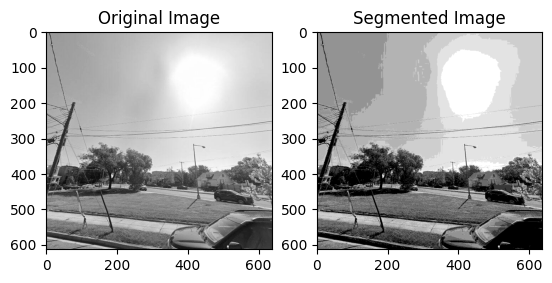

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# gray scale images with histogram

# Load grayscale image
img = cv2.imread('street_view_10_grey.jpg', cv2.IMREAD_GRAYSCALE)

# Compute intensity histogram
hist, bins = np.histogram(img.ravel(), 256, [0, 256])

# Reshape histogram into a 2D array of pixel intensities
pixel_values = np.column_stack((bins[:-1], hist))

# Choose the number of clusters
K = 8

# Initialize cluster centroids using intensity histogram
centroids = np.zeros((K, 1))
for k in range(K):
    index = np.argmax(pixel_values[:, 1])
    centroids[k] = pixel_values[index, 0]
    pixel_values = np.delete(pixel_values, index, axis=0)

# Assign pixels to clusters
labels = np.zeros((img.shape[0], img.shape[1]))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        pixel_intensity = img[i, j]
        distances = np.abs(pixel_intensity - centroids.flatten())
        cluster_index = np.argmin(distances)
        labels[i, j] = cluster_index

# Update centroids
for k in range(K):
    cluster_pixels = img[labels == k]
    if len(cluster_pixels) > 0:
        centroids[k] = np.mean(cluster_pixels)

# Repeat steps 5-6 until convergence
max_iterations = 100
for iteration in range(max_iterations):
    old_centroids = centroids.copy()

    # Assign pixels to clusters
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_intensity = img[i, j]
            distances = np.abs(pixel_intensity - centroids.flatten())
            cluster_index = np.argmin(distances)
            labels[i, j] = cluster_index

    # Update centroids
    for k in range(K):
        cluster_pixels = img[labels == k]
        if len(cluster_pixels) > 0:
            centroids[k] = np.mean(cluster_pixels)

    # Check for convergence
    if np.all(old_centroids == centroids):
        break

# Segment the image
segmented_values = np.zeros_like(img)
for k in range(K):
    segmented_values[labels == k] = centroids[k]

# Visualize the original and segmented images
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(segmented_values, cmap='gray')
axs[1].set_title('Segmented Image')
plt.show()


# Scenerio 2 

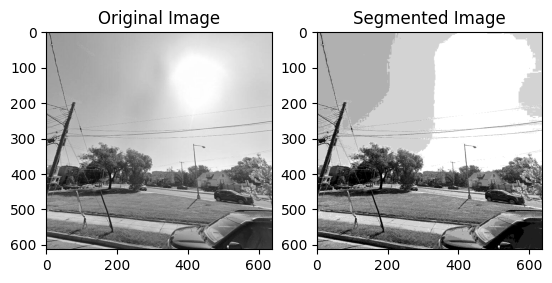

In [4]:
# grayscale images without histogram
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load grayscale image
img = cv2.imread('street_view_10_grey.jpg', cv2.IMREAD_GRAYSCALE)

# Reshape image into a 2D array of pixels
pixel_values = img.reshape(-1, 1)

# Choose the number of clusters
K = 8

# Initialize cluster centroids
centroids = np.random.randint(0, 256, size=K)

# Assign pixels to clusters
labels = np.zeros_like(pixel_values)
for i in range(pixel_values.shape[0]):
    pixel_intensity = pixel_values[i, 0]
    distances = np.abs(pixel_intensity - centroids)
    cluster_index = np.argmin(distances)
    labels[i, 0] = cluster_index

# Update centroids
for k in range(K):
    cluster_pixels = pixel_values[labels == k]
    if len(cluster_pixels) > 0:
        centroids[k] = np.mean(cluster_pixels)

# Repeat steps 5-6 until convergence
max_iterations = 100
for iteration in range(max_iterations):
    old_centroids = centroids.copy()

    # Assign pixels to clusters
    for i in range(pixel_values.shape[0]):
        pixel_intensity = pixel_values[i, 0]
        distances = np.abs(pixel_intensity - centroids)
        cluster_index = np.argmin(distances)
        labels[i, 0] = cluster_index

    # Update centroids
    for k in range(K):
        cluster_pixels = pixel_values[labels == k]
        if len(cluster_pixels) > 0:
            centroids[k] = np.mean(cluster_pixels)

    # Check for convergence
    if np.all(old_centroids == centroids):
        break

# Segment the image
segmented_values = np.zeros_like(pixel_values)
for k in range(K):
    segmented_values[labels == k] = centroids[k]

# Reshape segmented values into an image
segmented_img = segmented_values.reshape(img.shape)

# Visualize the original and segmented images
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(segmented_img, cmap='gray')
axs[1].set_title('Segmented Image')
plt.show()


# Question 2

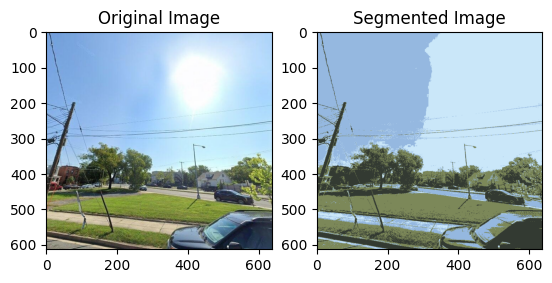

In [5]:
# color images without histogram
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load RGB image
img = cv2.imread('street_view_10_cut.jpg')

# Reshape image into a 2D array of pixels
pixel_values = img.reshape(-1, 3)

# Choose the number of clusters
K = 4

# Initialize cluster centroids
centroids = np.random.randint(0, 256, size=(K, 3))

# Assign pixels to clusters
labels = np.zeros((pixel_values.shape[0],))
for i in range(pixel_values.shape[0]):
    pixel_intensity = pixel_values[i, :]
    distances = np.sum(np.abs(pixel_intensity - centroids)**2, axis=1)
    cluster_index = np.argmin(distances)
    labels[i] = cluster_index

# Update centroids
for k in range(K):
    cluster_pixels = pixel_values[labels == k]
    if len(cluster_pixels) > 0:
        centroids[k, :] = np.mean(cluster_pixels, axis=0)

# Repeat steps 5-6 until convergence
max_iterations = 10000
for iteration in range(max_iterations):
    old_centroids = centroids.copy()

    # Assign pixels to clusters
    for i in range(pixel_values.shape[0]):
        pixel_intensity = pixel_values[i, :]
        distances = np.sum(np.abs(pixel_intensity - centroids)**2, axis=1)
        cluster_index = np.argmin(distances)
        labels[i] = cluster_index

    # Update centroids
    for k in range(K):
        cluster_pixels = pixel_values[labels == k]
        if len(cluster_pixels) > 0:
            centroids[k, :] = np.mean(cluster_pixels, axis=0)

    # Check for convergence
    if np.all(old_centroids == centroids):
        break

# Segment the image
segmented_values = np.zeros_like(pixel_values)
for k in range(K):
    segmented_values[labels == k] = centroids[k, :]

# Reshape segmented values into an image
segmented_img = segmented_values.reshape(img.shape)

# Visualize the original and segmented images
fig, axs = plt.subplots(1, 2)
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(cv2.cvtColor(segmented_img.astype(np.uint8), cv2.COLOR_BGR2RGB))
axs[1].set_title('Segmented Image')
plt.show()
